In [1]:
from run_sim import run_sim
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
# set up dataframe for collecting event data
mtd_operation_record, attack_operation_record = run_sim()

Target Node is:  82
Adversary: Start Host Scan at 0.0s.
Adversary: Processed host scan at 5.0s.
Adversary: Start Host Enum at 5.0s.
Adversary: Processed host enum at 10.0s.
Adversary: Start port scan at 10.0s.
Adversary: Processed port scan at 20.0s.
Adversary: Start vulnerability exploitation at 20.0s.
MTD: UserShuffle triggered 30.2s
MTD: UserShuffle deployed in the network at 30.2s.
MTD: UserShuffle finished in 10.3s at 40.5s.
MTD: Interrupted vulnerability_exploit at 40.5s!
Adversary: Restarting with host scan operation!
Adversary: Start Host Scan at 42.5s.
Adversary: Processed host scan at 47.5s.
Adversary: Start Host Enum at 47.5s.
Adversary: Processed host enum at 52.5s.
Adversary: Start port scan at 52.5s.
MTD: HostTopologyShuffle triggered 61.5s
MTD: HostTopologyShuffle deployed in the network at 61.5s.
Adversary: Processed port scan at 62.5s.
Adversary: Start vulnerability exploitation at 62.5s.
MTD: UserShuffle triggered 92.9s
MTD: UserShuffle deployed in the network at 92.9

In [3]:
mtd_operation_record = pd.DataFrame(mtd_operation_record)
mtd_operation_record

,name,start_time,finish_time,duration
0,UserShuffle,30.156183,40.492435,10.336253
1,HostTopologyShuffle,61.539565,101.645413,40.105848
2,UserShuffle,92.902210,103.040708,10.138498
3,osdiversity,153.826182,184.153664,30.327482
4,CompleteTopologyShuffle,123.452683,193.479547,70.026864
5,UserShuffle,184.227501,194.397414,10.169913
6,osdiversity,214.607584,244.970110,30.362526
7,IPShuffle,244.641238,295.209051,50.567814
8,serviceDiversity,275.098507,316.067781,40.969273
9,CompleteTopologyShuffle,306.186511,380.289838,74.103327


In [4]:
# fig1 = go.Figure(go.Waterfall(x = mtd_operation_record['start_time'],
#                               y = mtd_operation_record['name'],
#                               measure = ['absolute']*100,
#                               connector = {"mode":"between", "line":{"color":"red"}}))
#
# fig1.update_layout(title = 'Time duration of MTD operations',
#                    xaxis_title = 'Time' , yaxis_title = 'MTD techniques',
#                    width = 800, height = 600)

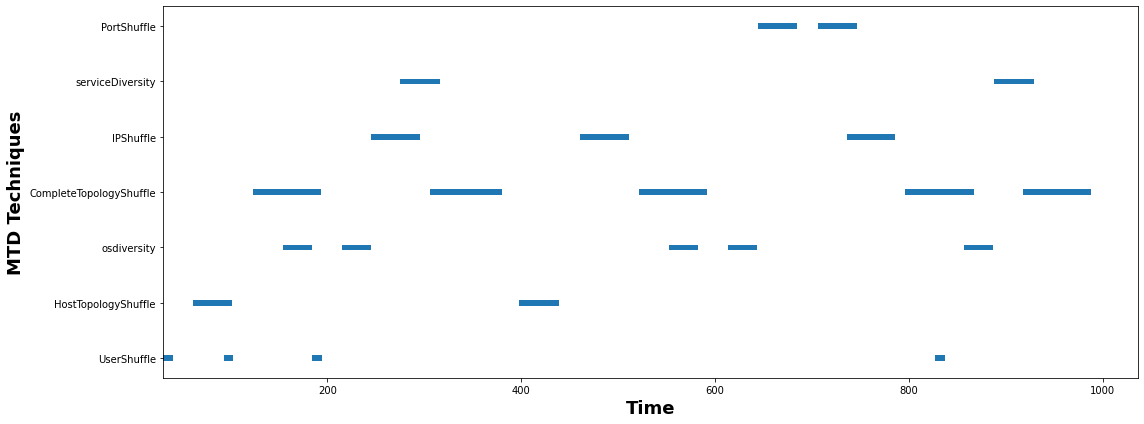

In [5]:
fig, ax = plt.subplots(1, figsize=(16, 6))
ax.barh(mtd_operation_record['name'], mtd_operation_record['duration'], left=mtd_operation_record['start_time'], height=0.1)

plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('MTD Techniques', weight='bold', fontsize=18)
fig.tight_layout()
plt.show()

In [6]:
attack_operation_record = pd.DataFrame(attack_operation_record)
attack_operation_record

,name,start_time,finish_time,duration,interrupted_in,interrupted_by,compromise_host
0,HostScan,0.000000,5.000000,5.000000,,,
1,HostEnum,5.000000,10.000000,5.000000,,,
2,PortScan,10.000000,20.000000,10.000000,,,
3,VulnerabilityExploit,20.000000,40.492435,20.492435,Network Layer,UserShuffle,
4,HostScan,42.492435,47.492435,5.000000,,,
...,...,...,...,...,...,...,...
76,PortScan,930.708744,940.708744,10.000000,,,
77,VulnerabilityExploit,940.708744,970.717168,30.008424,,,
78,BruteForce,970.717168,987.979676,17.262508,Network Layer,CompleteTopologyShuffle,
79,HostScan,989.979676,994.979676,5.000000,,,


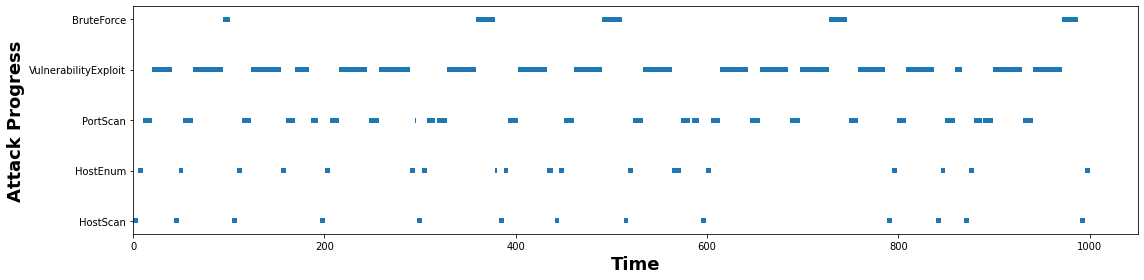

In [7]:
fig2, ax2 = plt.subplots(1, figsize=(16, 4))
ax2.barh(attack_operation_record['name'], attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.1)

plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Attack Progress', weight='bold', fontsize=18)
fig2.tight_layout()
plt.show()

In [8]:
attack_operation_record[(attack_operation_record['name'] == 'PortScan') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,interrupted_in,interrupted_by,compromise_host


In [9]:
attack_operation_record[(attack_operation_record['name'] == 'VulnerabilityExploit') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,interrupted_in,interrupted_by,compromise_host
12,VulnerabilityExploit,123.645413,154.443219,30.797806,,,0
22,VulnerabilityExploit,256.970110,289.850594,32.880484,,,38
35,VulnerabilityExploit,402.289838,432.978813,30.688975,,,47
47,VulnerabilityExploit,532.703662,563.017450,30.313788,,,40


In [10]:
attack_operation_record[(attack_operation_record['name'] == 'BruteForce') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,interrupted_in,interrupted_by,compromise_host


In [11]:
'''
1. event starts when port scan
2. event continue when
'''

'\n1. event starts when port scan\n2. event continue when\n'